In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [75]:
df = pd.read_csv("customer_churn_business_dataset.csv")
df.head()

,customer_id,gender,age,country,city,customer_segment,tenure_months,signup_channel,contract_type,monthly_logins,...,avg_resolution_time,complaint_type,csat_score,escalations,email_open_rate,marketing_click_rate,nps_score,survey_response,referral_count,churn
0,CUST_00001,Male,68,Bangladesh,London,SME,22,Web,Monthly,26,...,13.354360,Service,4.0,0,0.71,0.40,27,Satisfied,1,0
1,CUST_00002,Female,57,Canada,Sydney,Individual,9,Mobile,Monthly,7,...,25.140088,Billing,2.0,0,0.78,0.33,-19,Neutral,2,1
2,CUST_00003,Male,24,Germany,New York,SME,58,Web,Yearly,19,...,27.572928,Service,3.0,0,0.35,0.49,80,Neutral,1,0
3,CUST_00004,Male,49,Australia,Dhaka,Individual,19,Mobile,Yearly,34,...,26.420822,Technical,5.0,1,0.83,0.15,100,Neutral,0,0
4,CUST_00005,Male,65,Bangladesh,Delhi,Individual,52,Web,Monthly,20,...,26.674579,Technical,4.0,0,0.65,0.44,21,Unsatisfied,1,0


In [76]:
df.shape

(10000, 32)

In [77]:
df.isnull().sum()
df.dtypes

customer_id                object
gender                     object
age                         int64
country                    object
city                       object
customer_segment           object
tenure_months               int64
signup_channel             object
contract_type              object
monthly_logins              int64
weekly_active_days          int64
avg_session_time          float64
features_used               int64
usage_growth_rate         float64
last_login_days_ago         int64
monthly_fee                 int64
total_revenue               int64
payment_method             object
payment_failures            int64
discount_applied           object
price_increase_last_3m     object
support_tickets             int64
avg_resolution_time       float64
complaint_type             object
csat_score                float64
escalations                 int64
email_open_rate           float64
marketing_click_rate      float64
nps_score                   int64
survey_respons

In [78]:
df["complaint_type"] = df["complaint_type"].fillna("None")

In [79]:
def clean_numerical_data(df):
    pattern = r"^(0|[1-9]\d*)$"
    numerical_columns = ["age", "tenure_months", "monthly_logins", "weekly_active_days", "features_used", "last_login_days_ago", "monthly_fee", "total_revenue", "payment_failures", "support_tickets", "escalations", "referral_count"]
    for column in numerical_columns:
        invalid_mask = ~df[column].astype(str).str.fullmatch(pattern)
        if invalid_mask.any():
            df.loc[invalid_mask, column] = 0
    return df

df = clean_numerical_data(df)

In [80]:
def clean_nps_score(df):
    if df["nps_score"].any() >= -100 & df["nps_score"].any() <= 100:
        df["nps_score"] = df["nps_score"]
    else:
        df["nps_score"] = 0
    return df

df = clean_nps_score(df)

In [81]:
df["city"].unique()

array(['London', 'Sydney', 'New York', 'Dhaka', 'Delhi', 'Toronto',
       'Berlin'], dtype=object)

In [82]:
df["discount_applied"].unique()

array(['Yes', 'No'], dtype=object)

In [83]:
yes_no_columns = ["price_increase_last_3m", "discount_applied"]
for column in yes_no_columns:
    df[column] = df[column].map({"Yes": 1, "No": 0})

In [84]:
df["customer_id"].duplicated().sum()

np.int64(0)

In [85]:
expected_revenue = df["tenure_months"] * df["monthly_fee"]
diff = (expected_revenue.round(2) - df["total_revenue"].round(2)).abs()
error_count = (diff > 0).sum()
print(error_count)

0


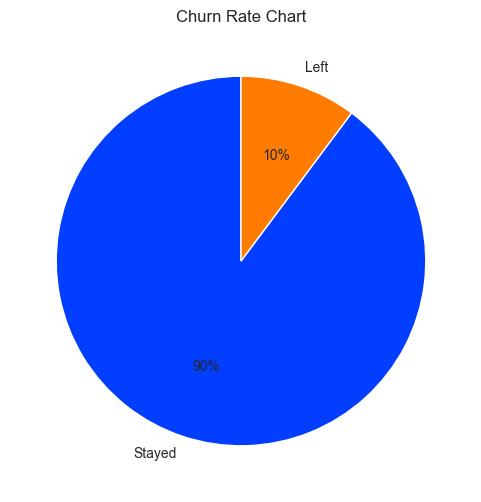

In [93]:
churn_count = df["churn"].value_counts()
labels = ["Stayed" if idx==0 else "Left" for idx in churn_count.index]

plt.figure(figsize = (6, 6))
color = sns.color_palette("bright")
plt.pie(churn_count, colors=color, autopct="%.0f%%", startangle=90, labels=labels)
plt.title("Churn Rate Chart")
plt.show()

In [101]:
df["avg_session_time"] = df["avg_session_time"].round(2)
df["avg_resolution_time"] = df["avg_resolution_time"].round(2)
df.columns

Index(['customer_id', 'gender', 'age', 'country', 'city', 'customer_segment',
       'tenure_months', 'signup_channel', 'contract_type', 'monthly_logins',
       'weekly_active_days', 'avg_session_time', 'features_used',
       'usage_growth_rate', 'last_login_days_ago', 'monthly_fee',
       'total_revenue', 'payment_method', 'payment_failures',
       'discount_applied', 'price_increase_last_3m', 'support_tickets',
       'avg_resolution_time', 'complaint_type', 'csat_score', 'escalations',
       'email_open_rate', 'marketing_click_rate', 'nps_score',
       'survey_response', 'referral_count', 'churn'],
      dtype='object')

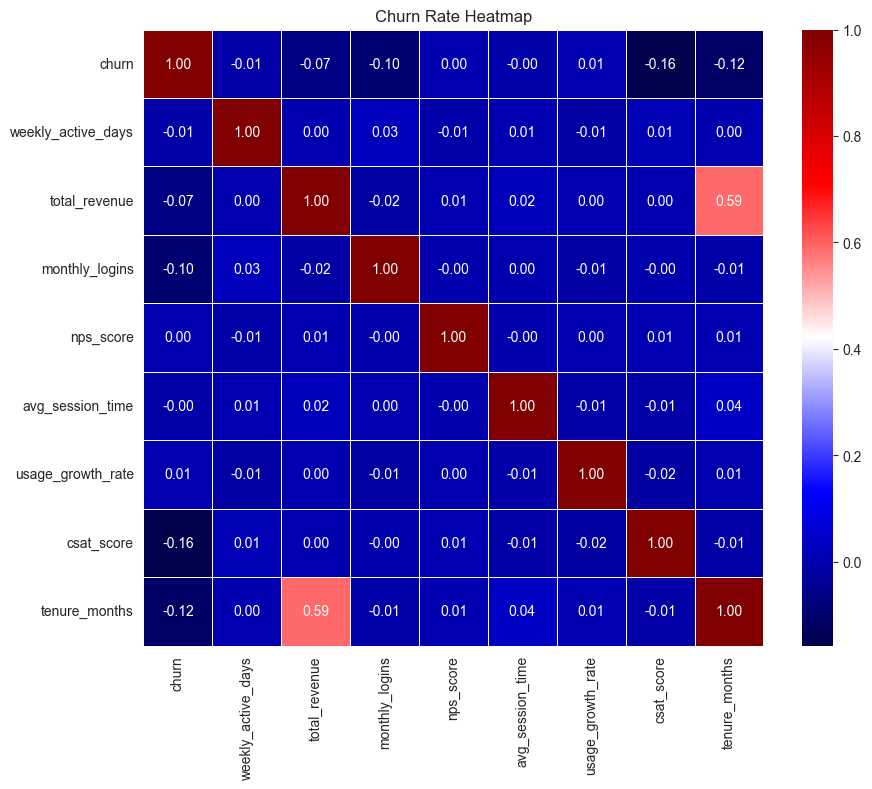

In [117]:
heatmap_columns = ["churn", "weekly_active_days", "total_revenue", "monthly_logins", "nps_score", "avg_session_time", "usage_growth_rate", "csat_score", "tenure_months"]

plt.figure(figsize = (10, 8))
sns.heatmap(df[heatmap_columns].corr(), annot = True, fmt=".2f", cmap="seismic", linewidths=0.5)
plt.title("Churn Rate Heatmap")
plt.show()